<a href="https://colab.research.google.com/github/samteotia30/internshipproject.io/blob/main/Netflix_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded
Shape: (7789, 11)
Columns: Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

🔎 Missing values before cleaning:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

🔎 Missing values after cleaning:
 Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    98
Rating           0
Duration         0
Type             0
Description      0
Year_Added      98
Month_Added     98
dtype: int64

🎬 Total Movies: 5377
📺 Total TV Shows: 2410
📅 Years covered: 2008.0 to 2021.0


/tmp/ipython-input-632466282.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=df, palette="Set2")


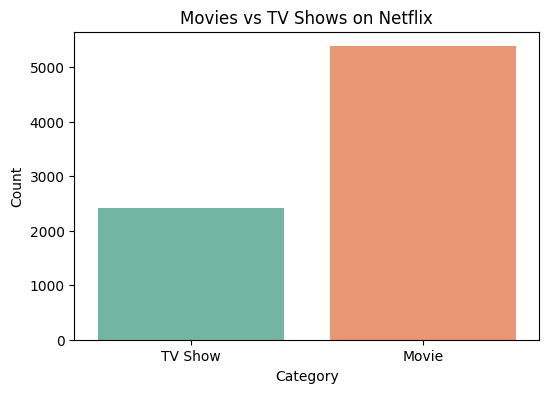

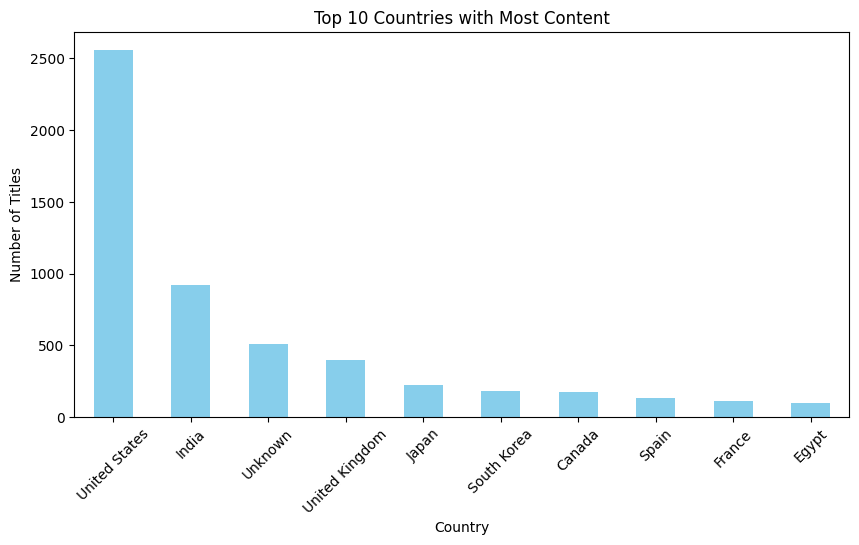

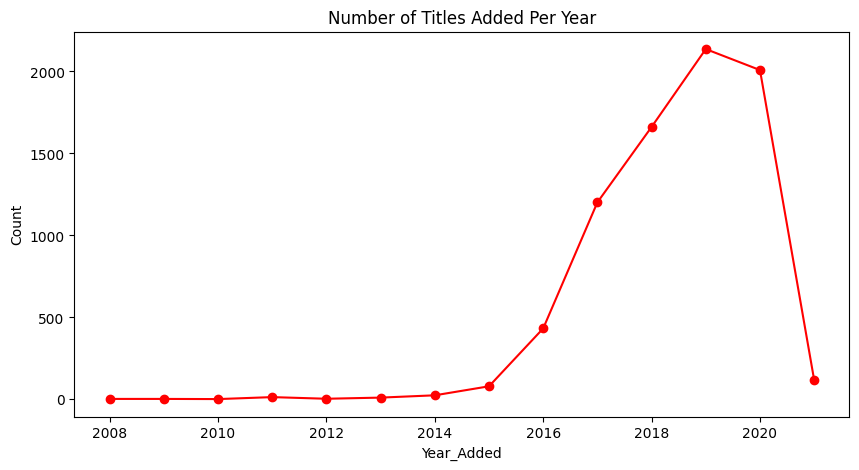

/tmp/ipython-input-632466282.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Rating", data=df, order=df['Rating'].value_counts().index, palette="coolwarm")


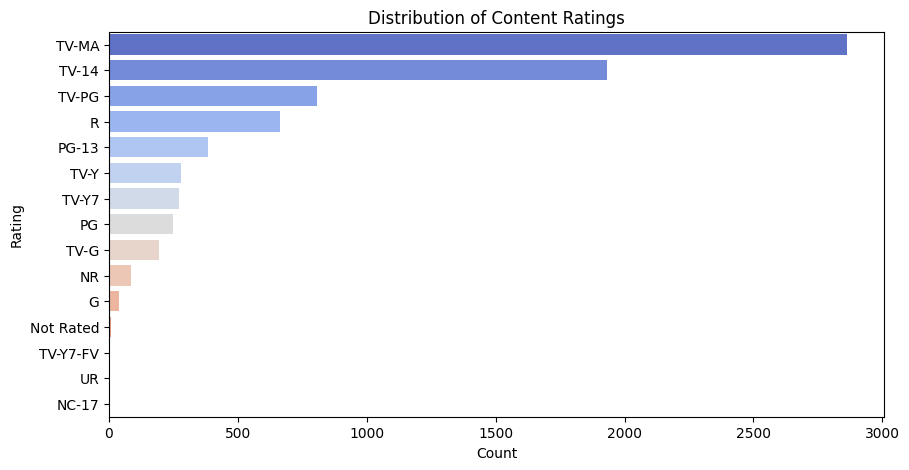

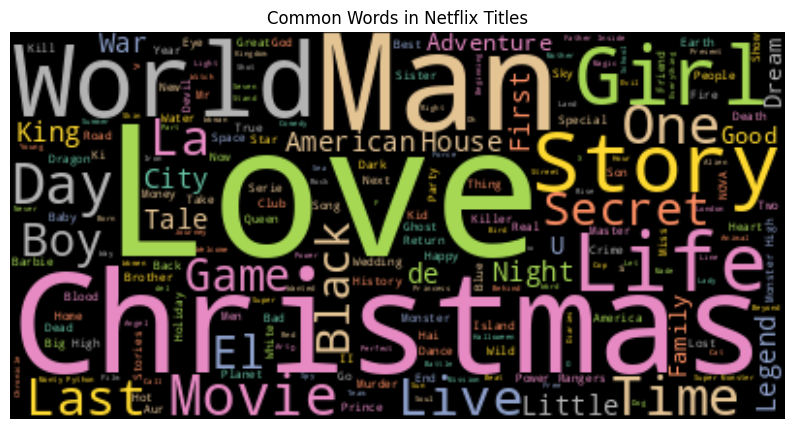

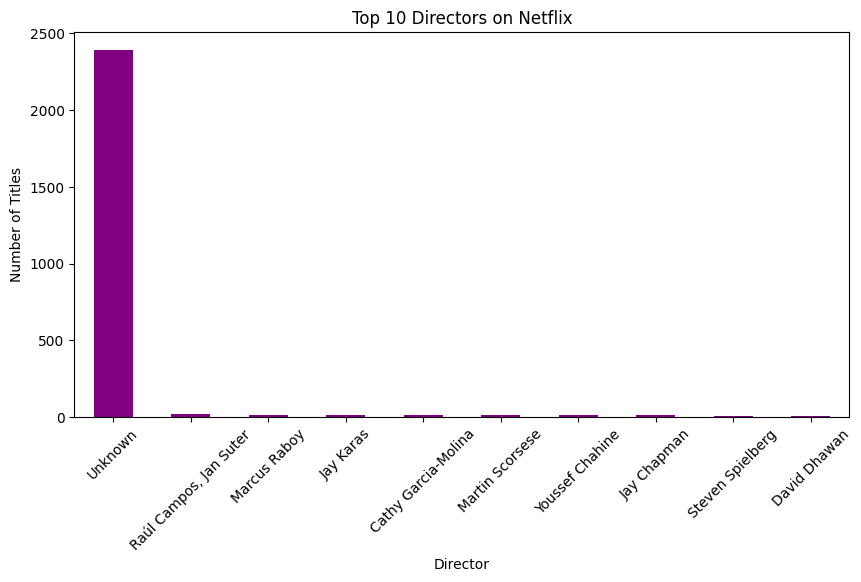

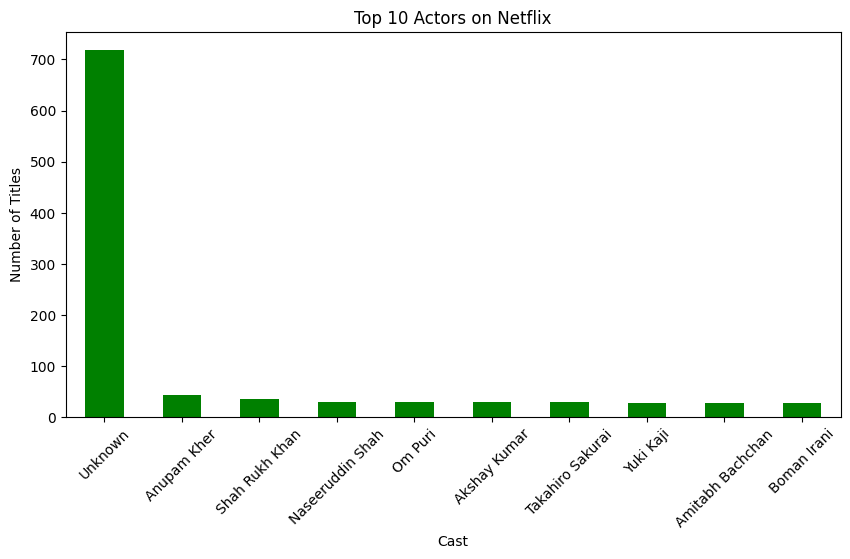


📌 Key Insights:
- Movies dominate over TV Shows in the dataset.
- USA and India are the top content-producing countries.
- Netflix saw a surge in new content additions in recent years.
- Ratings are mostly concentrated around TV-MA, TV-14, and R.
- Certain directors and actors have a strong presence on Netflix.


In [ ]:
# ============================================
# Netflix Data Cleansing, Analysis & Visualization
# Internship-Ready Code
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# -------------------------------
# Step 1: Load Data
# -------------------------------
# Place 'netflix_titles.csv' in the same folder or Google Drive
df = pd.read_csv("/content/Netflix Dataset.csv")

print("✅ Dataset Loaded")
print("Shape:", df.shape)
print("Columns:", df.columns)

# -------------------------------
# Step 2: Data Cleaning
# -------------------------------
print("\n🔎 Missing values before cleaning:\n", df.isnull().sum())

# Fill missing values (case-sensitive column names)
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors="coerce")
df['Year_Added'] = df['Release_Date'].dt.year
df['Month_Added'] = df['Release_Date'].dt.month

# Remove duplicates
df.drop_duplicates(inplace=True)

print("\n🔎 Missing values after cleaning:\n", df.isnull().sum())

# -------------------------------
# Step 3: Basic Analysis
# -------------------------------
print("\n🎬 Total Movies:", df[df['Category']=="Movie"].shape[0])
print("📺 Total TV Shows:", df[df['Category']=="TV Show"].shape[0])
print("📅 Years covered:", df['Year_Added'].min(), "to", df['Year_Added'].max())

# -------------------------------
# Step 4: Visualizations
# -------------------------------

# 1. Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x="Category", data=df, palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# 2. Top 10 countries with most content
plt.figure(figsize=(10,5))
df['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Content")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# 3. Titles added per year
plt.figure(figsize=(10,5))
df['Year_Added'].value_counts().sort_index().plot(kind='line', marker='o', color='red')
plt.title("Number of Titles Added Per Year")
plt.ylabel("Count")
plt.show()

# 4. Distribution of Ratings
plt.figure(figsize=(10,5))
sns.countplot(y="Rating", data=df, order=df['Rating'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

# 5. WordCloud of Titles
text = " ".join(title for title in df['Title'])
wordcloud = WordCloud(background_color="black", colormap="Set2").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Netflix Titles")
plt.show()

# -------------------------------
# Step 5: Advanced Insights
# -------------------------------

# Top 10 Directors
plt.figure(figsize=(10,5))
df['Director'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Directors on Netflix")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# Top 10 Actors
plt.figure(figsize=(10,5))
actors = df['Cast'].str.split(",").explode().str.strip()
actors.value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Actors on Netflix")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# Step 6: Key Insights
# -------------------------------
print("\n📌 Key Insights:")
print("- Movies dominate over TV Shows in the dataset.")
print("- USA and India are the top content-producing countries.")
print("- Netflix saw a surge in new content additions in recent years.")
print("- Ratings are mostly concentrated around TV-MA, TV-14, and R.")
print("- Certain directors and actors have a strong presence on Netflix.")
